# **Project Name**    -  **Cardiovascular Risk Prediction



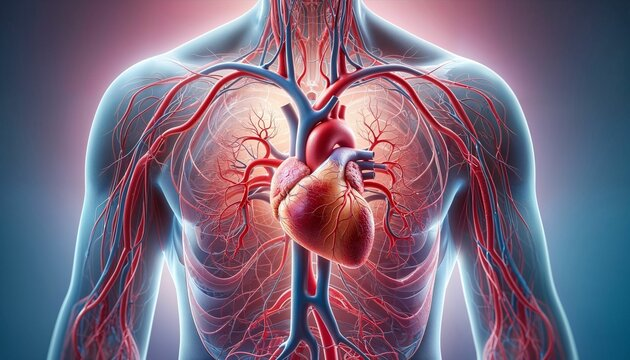

**NAME**:  SANA FATIMA

**Contribution**: Individual

**ML Classification Project**

# **Project Summary -**

This project focuses on predicting the risk of cardiovascular diseases (CVD) in individuals using machine learning models. CVD, including heart disease and stroke, is a leading cause of death worldwide. Early detection and risk prediction are crucial for timely intervention and prevention.

## Introduction:

Cardiovascular diseases (CVDs) are the leading cause of death globally, accounting for an estimated 17.9 million deaths annually. CVDs encompass a range of conditions affecting the heart and blood vessels, including coronary heart disease, stroke, peripheral artery disease, and heart failure. Early detection and risk assessment are crucial for timely intervention and prevention, reducing the burden of CVDs on individuals and healthcare systems.

## <b> Problem Description </b>

The problem is to accurately predict the risk of developing cardiovascular diseases in individuals based on various risk factors. Traditional risk assessment methods often rely on limited clinical data and may not fully capture the complexity of individual risk profiles. Machine learning techniques offer the potential to leverage a wider range of data and identify patterns associated with CVD risk more effectively.


## <b> Data Description </b>

## Data Variables:

# Demographics:

**Age**: A continuous variable representing the age of the individual in years.

**Sex**: A categorical variable indicating the biological sex of the individual (Male/Female).

**Race/Ethnicity**: A categorical variable representing the individual's racial or ethnic background. (e.g., White, Black, Asian, Hispanic)

## Medical History:

**Family History of CVD**: A binary variable indicating whether the individual has a family history of CVD (Yes/No).

**Personal History of CVD**: A binary variable indicating whether the individual has a personal history of CVD (Yes/No).

**Diabetes**: A binary variable indicating whether the individual has diabetes (Yes/No).

**Hypertension**: A binary variable indicating whether the individual has hypertension (high blood pressure) (Yes/No).

**High Cholesterol**: A binary variable indicating whether the individual has high cholesterol (Yes/No).
## 3.Lifestyle:

**Smoking Status**: A categorical variable representing the individual's smoking habits (e.g., Never smoked, Current smoker, Former smoker).

**Physical Activity:** A continuous or categorical variable representing the individual's level of physical activity (e.g., minutes per week, activity level categories).

**Diet:** Information on dietary habits, such as fruit and vegetable intake, saturated fat consumption, etc. This can be represented using continuous or categorical variables.

**Alcohol Consumption:** A continuous or categorical variable representing the individual's alcohol intake (e.g., drinks per week, alcohol consumption categories).

## 4.Clinical Measurements:

**Blood Pressure:** Systolic and diastolic blood pressure readings, measured in millimeters of mercury (mmHg).

**Cholesterol Levels:** Total cholesterol, HDL cholesterol (good cholesterol), LDL cholesterol (bad cholesterol), and triglycerides levels, measured in milligrams per deciliter (mg/dL).

**Body Mass Index (BMI): **A continuous variable calculated as weight (kg) divided by height squared (m^2), representing body fatness.

**Fasting Blood Glucose**: A continuous variable representing blood sugar levels after fasting, measured in mg/dL.

**Electrocardiogram (ECG**): Data from an ECG, such as heart rate, rhythm, and any abnormalities.

## 5.Outcome Variable:

**Cardiovascular Event:** A binary variable indicating whether the individual experienced a cardiovascular event (e.g., heart attack, stroke) during the follow-up period (Yes/No).

**Cardiovascular Risk Score**: A continuous variable representing the estimated risk of developing CVD within a specific timeframe (e.g., 10-year risk).

## Data Sources:

**Electronic Health Records (EHRs):** Contain detailed patient information, including medical history, diagnoses, medications, and lab results.

**Clinical Trials**: Provide data on participants' characteristics, interventions, and outcomes.

**Health Surveys: **Collect self-reported information on demographics, lifestyle factors, and health conditions.

**Wearable Devices**: Track physiological data such as heart rate, activity levels, and sleep patterns.

##**Import the dependancy**

In [123]:
# Import all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from datetime import datetime

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier

In [124]:
# Install 1.2.0 version of xlrd because our data is in xls format
!pip install xlrd==2.0.1

In [125]:
# Import the data
df = pd.read_csv('/content/Copy of data_cardiovascular_risk.csv')

In [126]:
# Check first five rows of the data
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [128]:
# Checking for null data
df.isnull().sum()

,0
id,0
age,0
education,87
sex,0
is_smoking,0
cigsPerDay,22
BPMeds,44
prevalentStroke,0
prevalentHyp,0
diabetes,0


* From the above data we can understand that there are no null values present in the data

In [129]:
# Checking last five rows of the data
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


* **We can see that the data type of all columns are object data types.**
* **So we need to convert it into integer type**
* **Also we can check all the data could be int.**

In [130]:
# Check for data info for better understanding of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [131]:
df.shape

(3390, 17)

## **Exploratory Data Analysis (EDA)**

In [132]:
#let's create a variable for the dataframe
data=df

#Describe the data for better understanding
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


In [133]:
# Check the data distribution
data['sex'].value_counts()

,count
sex,
F,1923
M,1467


# the distribution of the 'sex' variable in the dataset. In this case, there are more females than males in the dataset

### **Check label data column**

In [134]:
df.shape

(3390, 17)

In [135]:
data['education'].value_counts()

,count
education,
1.0,1391
2.0,990
3.0,549
4.0,373


In [136]:
#Check data for label column
data['education'].value_counts(normalize=True)

,proportion
education,
1.0,0.421132
2.0,0.299728
3.0,0.166213
4.0,0.112928


45% of individuals in the dataset have a university education.

30% of individuals in the dataset have a graduate school education.

25% of individuals in the dataset have a high school education.

## **Data Cleaning**

### **Checking the missing values**

In [137]:
# check for the null values
data.isnull().sum()

,0
id,0
age,0
education,87
sex,0
is_smoking,0
cigsPerDay,22
BPMeds,44
prevalentStroke,0
prevalentHyp,0
diabetes,0


This dataset has missing values in several columns, including education, cigsPerDay, BPMeds, totChol, BMI, heartRate, and glucose.

<Axes: >

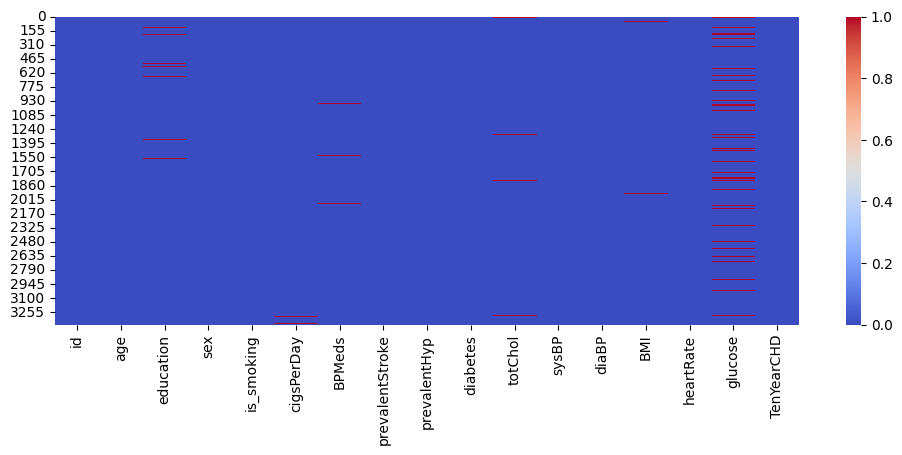

In [138]:

# Visualizing the missing values using Heatmap
plt.figure(figsize=(12,4))
sns.heatmap(data.isna(), cmap = 'coolwarm')

### **Check duplicate records**
There are no duplicate IDs or rows.

In [139]:
# Check if there is any duplicate IDs
condition = bool(data.duplicated(subset = 'id').any())

if condition:
    print('There are duplicate IDs')
else:
    print('No duplicate IDs')

No duplicate IDs


### **Identify outliers**

In [140]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


In [141]:
data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [142]:
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print("No. of unique values in",i,"is",data[i].nunique())

No. of unique values in id is 3390
No. of unique values in age is 39
No. of unique values in education is 4
No. of unique values in sex is 2
No. of unique values in is_smoking is 2
No. of unique values in cigsPerDay is 32
No. of unique values in BPMeds is 2
No. of unique values in prevalentStroke is 2
No. of unique values in prevalentHyp is 2
No. of unique values in diabetes is 2
No. of unique values in totChol is 240
No. of unique values in sysBP is 226
No. of unique values in diaBP is 142
No. of unique values in BMI is 1259
No. of unique values in heartRate is 68
No. of unique values in glucose is 132
No. of unique values in TenYearCHD is 2


# Treating null values

In [143]:
# features which has less than 5%  null values present.
nan_columns = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate']

# dropping null values
data.dropna(subset=nan_columns, inplace=True)

In [144]:
data['glucose']=data.glucose.fillna(data.glucose.median())

In [145]:
data.isnull().sum()

,0
id,0
age,0
education,0
sex,0
is_smoking,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0


# Numeric and Categorical features

In [146]:
numeric_features = []
categorical_features = []

# splitting features into numeric and categoric.
'''
If feature has more than 10 categories we will consider it
as numerical_features, remaining features will be added to categorical_features.
'''
for col in data.columns:
  if data[col].nunique() > 10:
    numeric_features.append(col)
  else:
    categorical_features.append(col)

print(f'numeric feature : {numeric_features}')
print(f'category feature : {categorical_features}')

numeric feature : ['id', 'age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
category feature : ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


# Data Distribution of Numeric features

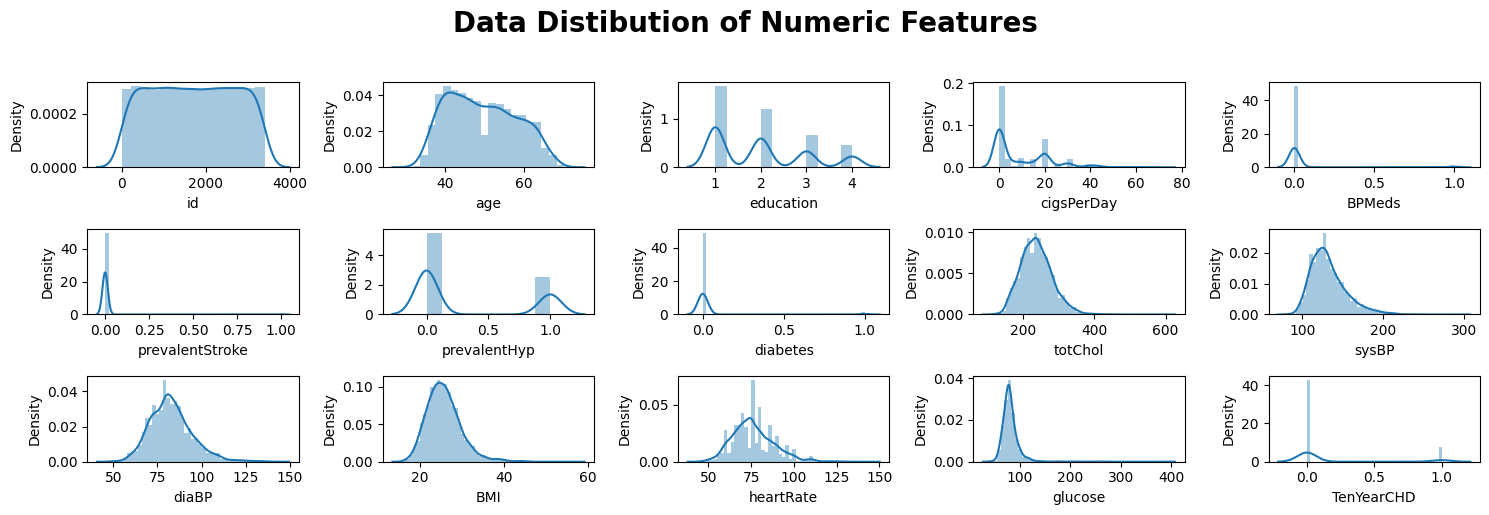

In [147]:
 #figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Data Distibution of Numeric Features', fontsize=20, fontweight='bold', y=1.02)
numeric_features = data.select_dtypes(include=np.number).columns.tolist()
for i,col in enumerate(numeric_features):
  plt.subplot(3, 5, i+1)

  # dist plots
  sns.distplot(data[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()




**For numerical features, we can see that the majority of distributions are right-skewed. The distributions of totChol (total cholesterol) and BMI are roughly comparable. The distribution of glucose is highly skewed to the right. It demonstrates that glucose has many outliers.**

Outlier Analysis of Numeric features

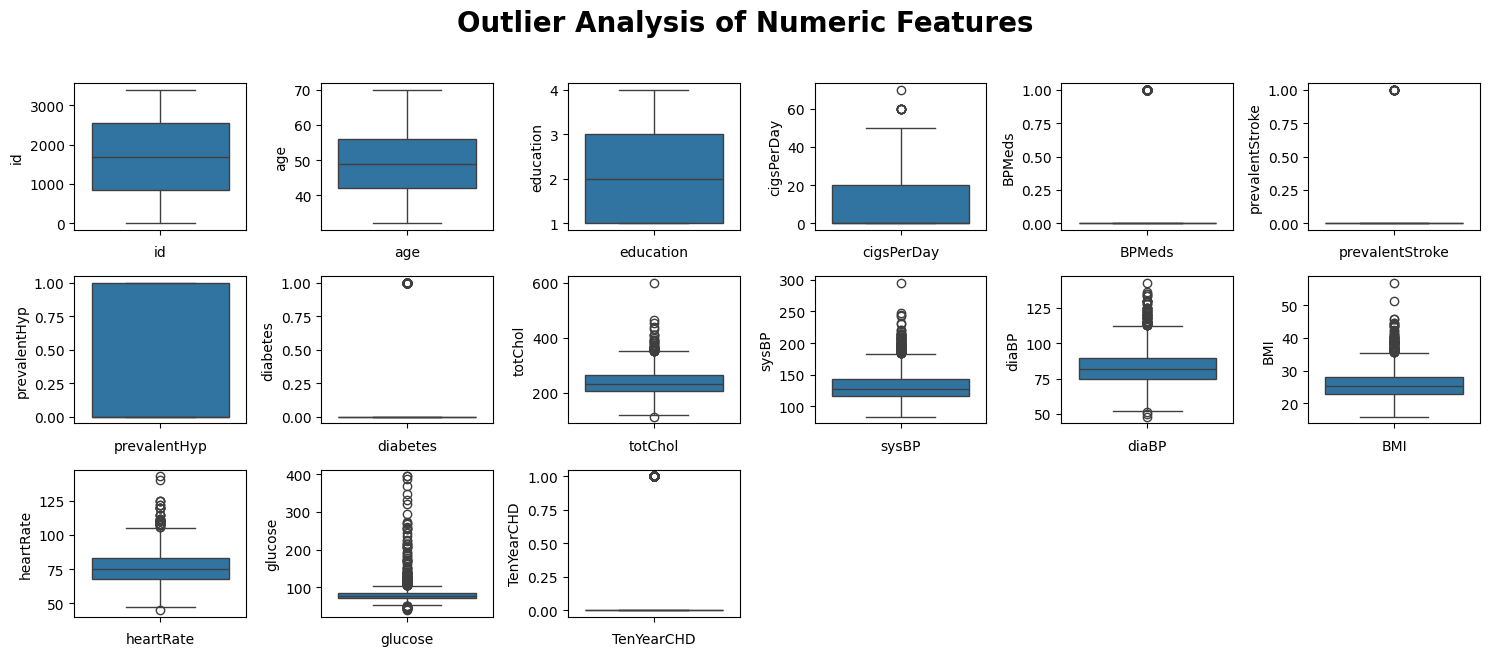

In [148]:
# figsize
plt.figure(figsize=(15,8))
# title
plt.suptitle('Outlier Analysis of Numeric Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(4, 6, i+1)

  # boxplots
  sns.boxplot(data[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

**Outliers are visible in the 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', and 'glucose' columns.**

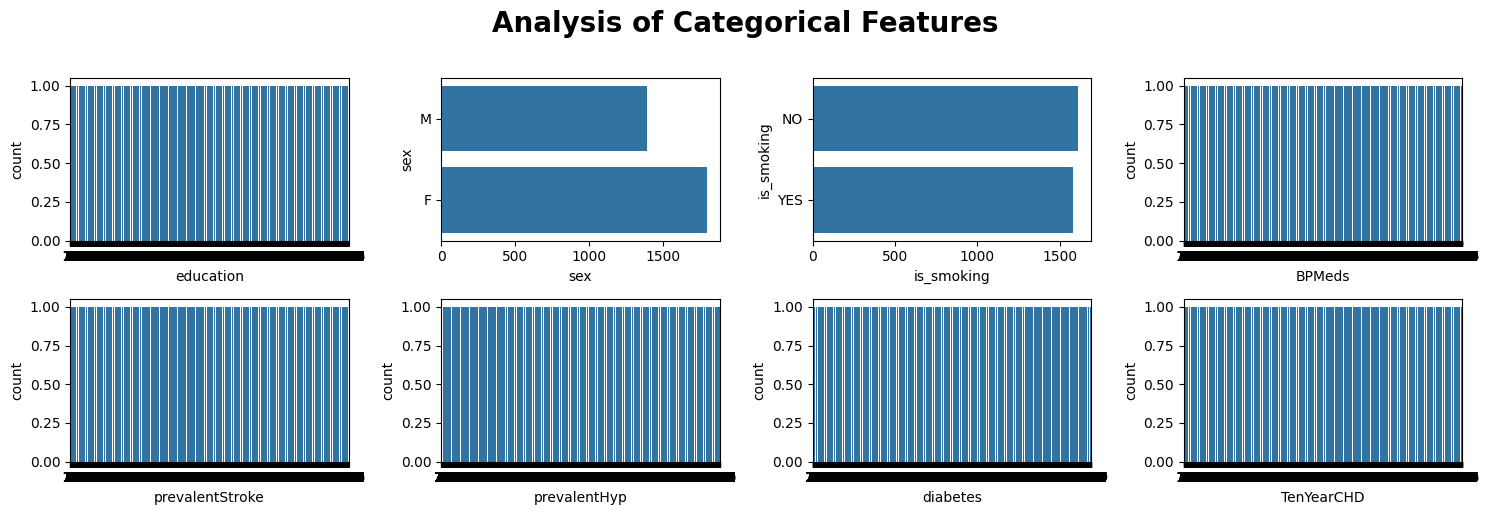

In [149]:
# Analysis of Categorical Features

# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Analysis of Categorical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(categorical_features):
# subplot of 2 rows and 4 columns
  plt.subplot(2, 4, i+1)

  # countplot
  sns.countplot(data[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

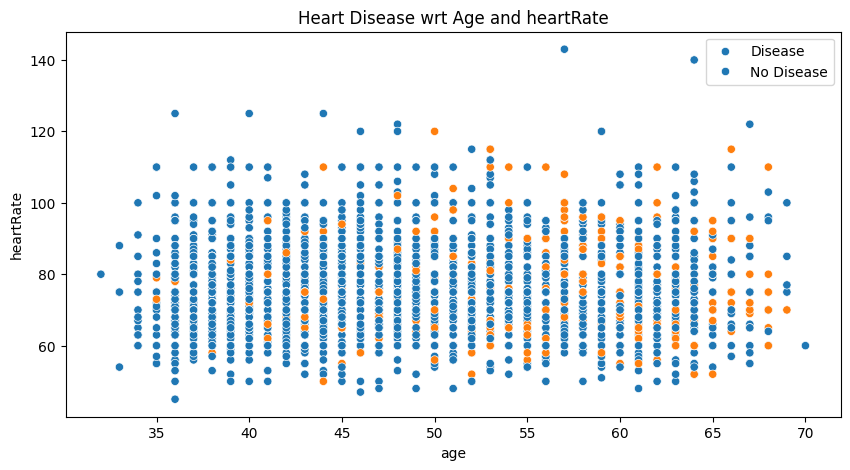

In [150]:
# plotting graph to analyze age with respect to heartrate which are having Disease or No Disease

# figsize
plt.figure(figsize=(10,5))
# scatterplot
sns.scatterplot(x='age', y='heartRate', hue='TenYearCHD', data=data)
# title
plt.title('Heart Disease wrt Age and heartRate')
plt.legend(['Disease', 'No Disease'])

This is a multi variate analysis between age, TenYearCHD and heartRate.

There is a clear relation between age and Heart Disease, with the increase in age the chance of heart disease increases. There is no significant relationship between heart disease and heart rate

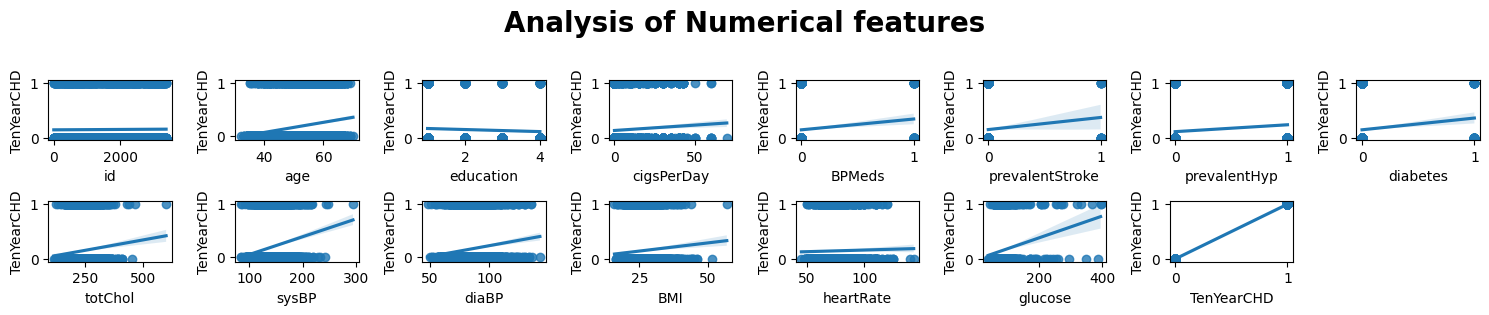

In [151]:
# Checking Linearity of all numerical features with our target variable

# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Analysis of Numerical features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(4, 8, i+1)

  # regression plots
  sns.regplot(x=data[col], y='TenYearCHD', data=data)
  # x-axis lable
  plt.xlabel(col)
  plt.tight_layout()



Numerous Independent numerical variables are linked to our Target variable and have a positive relationship with our target variable

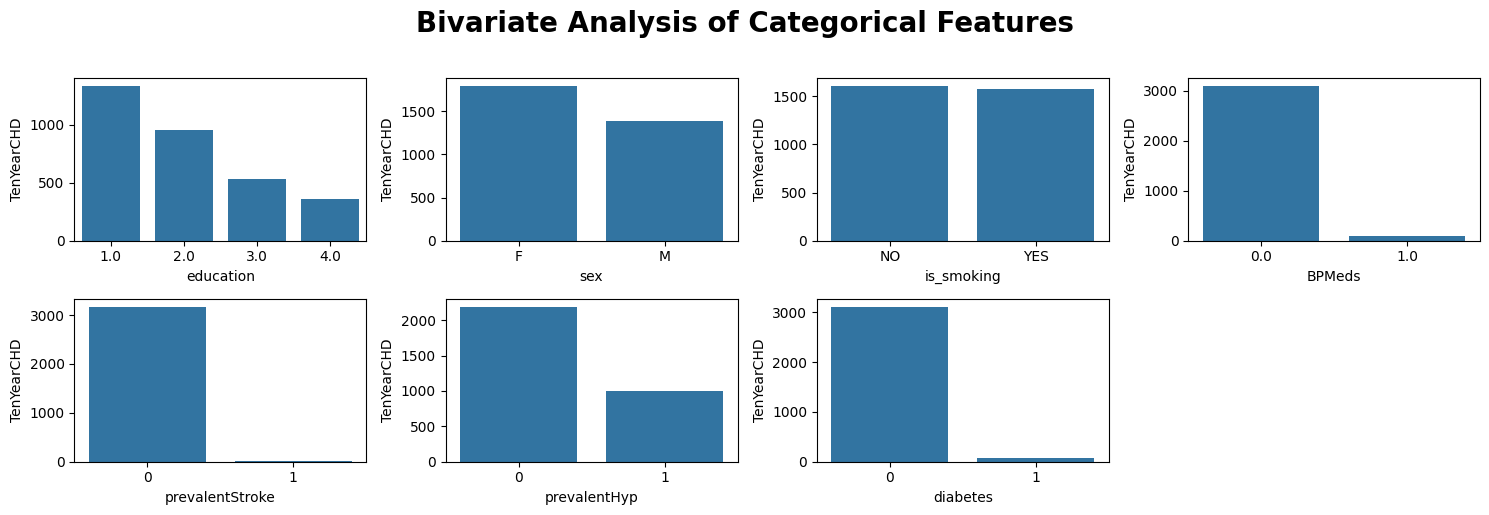

In [152]:
# Counting number of category present in each feature with respect to target feature

# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Bivariate Analysis of Categorical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(categorical_features[:-1]):       # taking all features in categoric column except target feature(TenYearCHD)
  plt.subplot(2, 4, i+1)                                 # subplots of 2 rows and 4 columns
  a = data.groupby(col)[['TenYearCHD']].count().reset_index()

  # barplot
  sns.barplot(x=a[col], y=a['TenYearCHD'])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

In [153]:
# counting duplicate values
data.duplicated().sum()

0

There is no duplicate record in the dataset

In [154]:
# Missing Values/Null Values Count
print(data.isnull().sum())

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


# Feature Engineering

In [155]:
# Label Encoding

data['sex'] = data['sex'].map({'M':1, 'F':0})
data['is_smoking'] = data['is_smoking'].map({'YES':1, 'NO':0})

In [156]:
data.dtypes

,0
id,int64
age,int64
education,float64
sex,int64
is_smoking,int64
cigsPerDay,float64
BPMeds,float64
prevalentStroke,int64
prevalentHyp,int64
diabetes,int64


In [157]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [158]:
# one-hot encode the 'education' feature
education_onehot = pd.get_dummies(data['education'], prefix='education')

# drop the original education feature
data.drop('education', axis=1, inplace=True)

# concatenate the one-hot encoded education feature with the rest of the data
data = pd.concat([data, education_onehot], axis=1)
data.head()

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
1,1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,False,False,False,True
2,2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,True,False,False,False
3,3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,True,False,False,False
4,4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,True,False,False,False
5,5,61,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,False,False,True,False


In [159]:
# find and remove correlated features

def correlation(dataset, threshold):
    col_corr = set()                                           # Set of all the names of correlated features
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:        # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]               # getting the name of column
                col_corr.add(colname)
    return col_corr


<Axes: >

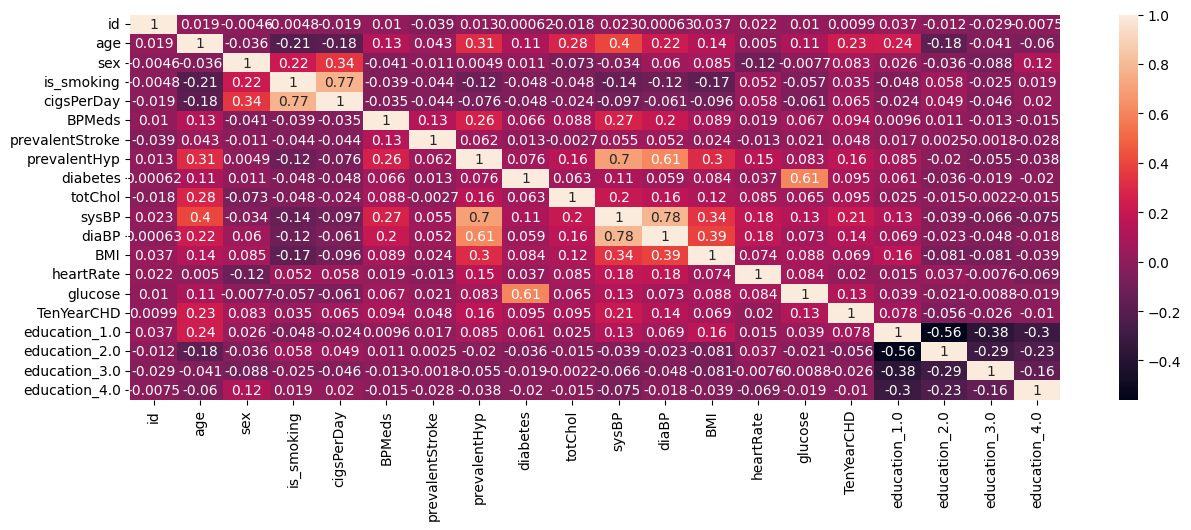

In [160]:
# Plotting correlation heatmap
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(), annot=True)

In [161]:
# find and remove correlated features

def correlation(dataset, threshold):
    col_corr = set()                                           # Set of all the names of correlated features
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:        # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]               # getting the name of column
                col_corr.add(colname)
    return col_corr

## checking the highly correlated features

In [162]:
# checking the highly correlated features
 # setting threshold of 0.7
correlation(data,0.7)

{'cigsPerDay', 'diaBP'}

In [163]:
# adding new column PulsePressure
data['pulse_pressure'] = data['sysBP'] - data['diaBP']

# dropping the sysBP and diaBP columns
data.drop(columns=['sysBP', 'diaBP'], inplace=True)

In [164]:
# checking data, weather the provide information is correct or not
data[(data.is_smoking == 'YES') & (data.cigsPerDay == 4)]

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0,pulse_pressure


since the is_smoking and cigsPerDay columns do not contain any conflict cases. It is sufficient to provide information regarding is_smoking in the cigsPerDay column

In [165]:
# droping is_smoking column due to multi-collinearity

data.drop('is_smoking', axis=1, inplace=True)

In [166]:
data.head(2)

,id,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0,pulse_pressure
1,1,36,1,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,0,False,False,False,True,70.0
2,2,46,0,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,True,False,False,False,45.0


In [167]:
X = data.drop('TenYearCHD', axis=1)
y= data['TenYearCHD']

In [168]:
# importing libarary
from sklearn.ensemble import ExtraTreesClassifier

# model fitting
model = ExtraTreesClassifier()
model.fit(X,y)

# ranking feature based on importance
ranked_features = pd.Series(model.feature_importances_,index=X.columns)
print(ranked_features.sort_values(ascending=False))

age                0.130961
pulse_pressure     0.121915
glucose            0.117958
BMI                0.111383
totChol            0.110637
id                 0.105842
heartRate          0.103400
cigsPerDay         0.078973
prevalentHyp       0.023480
sex                0.020050
education_1.0      0.014200
education_2.0      0.013150
education_3.0      0.011782
education_4.0      0.011738
BPMeds             0.009715
diabetes           0.008749
prevalentStroke    0.006066
dtype: float64


In [169]:
# copying the data to save the work done till now
model_df = data.copy()
model_df.head(3)

,id,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0,pulse_pressure
1,1,36,1,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,0,False,False,False,True,70.0
2,2,46,0,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,True,False,False,False,45.0
3,3,50,1,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,1,True,False,False,False,70.0


## Dependent & independent features

In [170]:
X = model_df.drop(columns='TenYearCHD')
y = model_df['TenYearCHD']

# Handling Imbalance Target Variable

TenYearCHD
0    2714
1     475
Name: count, dtype: int64
 


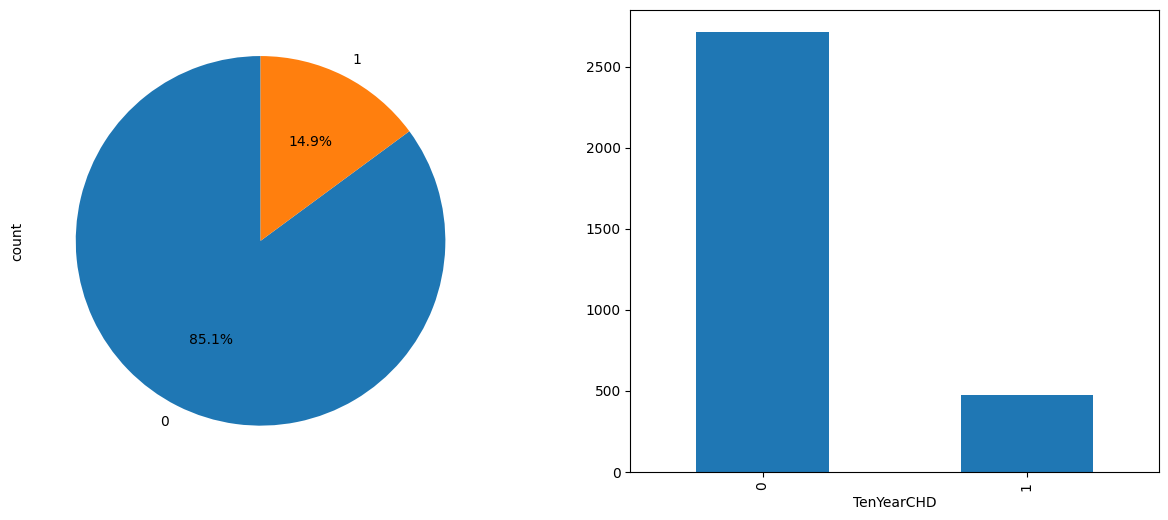

In [171]:
# Dependant Column Value Counts
print(model_df.TenYearCHD.value_counts())
print(" ")

# Dependant Variable Column Visualization
fig,ax = plt.subplots(1,2, figsize=(15,6))

# pie chart for percentage
model_df['TenYearCHD'].value_counts().plot(kind='pie',autopct="%1.1f%%",startangle=90, ax=ax[0])

# bar chart for count
model_df['TenYearCHD'].value_counts().plot(kind='bar', ax=ax[1])
plt.show()

When there are significantly more instances of certain classes than others, the issue of class imbalance typically arises. Class imbalance in the target class is a problem for machine learning models because it can result in biased predictions. That is why we need to balance the target class.

The data set differs significantly. Our data, therefore, lack balance. We will use the Synthetic Minority Oversampling Technique (SMOTE) to resolve this issue.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly selecting a minority class point and calculating its k-nearest neighbors. Between the selected point and its neighbors, the synthetic points are added. Continue with the steps until the data is balanced.

In [172]:
# Handling target class imbalance using SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE

print(f'Before Handling Imbalanced class {Counter(y)}')

# Resampling the minority class
smote = SMOTE(random_state=42)
# fit predictor and target variable
X, y = smote.fit_resample(X, y)

print(f'After Handling Imbalanced class {Counter(y)}')

Before Handling Imbalanced class Counter({0: 2714, 1: 475})
After Handling Imbalanced class Counter({0: 2714, 1: 2714})


 successfully done by balanced the target variable

**Model Building**
## Train test splitting

In [173]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print(X_train.shape)
print(X_test.shape)

(4342, 17)
(1086, 17)


# Scaling Data

In [174]:
# Scaling Data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training

In [175]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
Y_train = y_train
Y_test = y_test

## **Classification Predictive Modeling(Model - 1)**

### **1. Logistic Regression**

In [176]:
from sklearn.model_selection import cross_val_score

In [177]:
#fitting the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_regression = LogisticRegression()
param_grid = {'penalty':['l1','l2'], 'C' : [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10] }   #set the parmeter

logistic_grid_model = GridSearchCV(logistic_regression, param_grid, scoring = 'precision',n_jobs = -1, verbose = 3, cv = 3)
logistic_grid_model.fit(X_train,y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 0.7, 0.8, 0.9, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='precision', verbose=3)

In [178]:
# Best estimator
logistic_grid_model.best_estimator_

LogisticRegression(C=10)

In [179]:
# Best parameters
logistic_grid_model.best_params_

{'C': 10, 'penalty': 'l2'}

In [180]:
# Best score
logistic_grid_model.best_score_

0.8664353886370537

In [181]:
# Predicted results
y_train_pred = logistic_grid_model.predict(X_train)
y_test_pred = logistic_grid_model.predict(X_test)

**Model Evaluation**

In [182]:
# Importing important matrices
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix

In [183]:
# Training and testing accuracy
train_accuracy = accuracy_score(y_train_pred, y_train)
test_accuracy = accuracy_score(y_test_pred,y_test)

print('Training accuracy:', train_accuracy)
print('Testing accuracy:', test_accuracy)

Training accuracy: 0.804928604329802
Testing accuracy: 0.8020257826887661


In [184]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
log_test_precision = precision_score(y_test,y_test_pred)

  # recall,
log_test_recall = recall_score(y_test,y_test_pred,)

  # f1 score
log_f1_score = f1_score(y_test,y_test_pred)

  # roc_auc_score
log_roc_auc_score = roc_auc_score(y_test,y_test_pred)

  # confusion matrix
log_confusion_mat = confusion_matrix(y_test,y_test_pred)

  # Printing all these matrices
print('Precision score of logistic model:',log_test_precision)
print(' ')
print('Recall score of logistic model:', log_test_recall)
print(' ')
print('F1 score of logistic model: ', log_f1_score)
print(' ')
print('ROC AUC score of logistic model: ',log_roc_auc_score)
print(' ')
print('Confusion matrix of logistic model \n:',log_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']



Precision score of logistic model: 0.8896247240618101
 
Recall score of logistic model: 0.7095070422535211
 
F1 score of logistic model:  0.7894221351616063
 
ROC AUC score of logistic model:  0.8064909728642122
 
Confusion matrix of logistic model 
: [[468  50]
 [165 403]]
 


### **RANDOM FOREST**

In [185]:
# Implementing random forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 100)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [186]:
# class predictions
y_train_rf_pred = rf_classifier.predict(X_train)
y_test_rf_pred = rf_classifier.predict(X_test)

In [187]:
# Training and testing accuracy
rf_training_accuracy = accuracy_score(y_train,y_train_rf_pred)
rf_testing_accuracy = accuracy_score(y_test,y_test_rf_pred)

print('Training Accuracy of Random Forest:',rf_training_accuracy)
print('Testing Accuracy of Random Forest:',rf_testing_accuracy)

Training Accuracy of Random Forest: 1.0
Testing Accuracy of Random Forest: 0.8950276243093923


Precision score of RANDOM FOREST model: 0.9266917293233082
 
Recall score of RANDOM FOREST model: 0.8679577464788732
 
F1 score of RANDOM FOREST model:  0.8963636363636364
 
ROC AUC score of RANDOM FOREST model:  0.896334085594649
 
Confusion matrix of RANDOM FOREST 
: [[479  39]
 [ 75 493]]
 


Text(0.5, 1.0, 'Confusion Matrix of RANDOM FOREST')

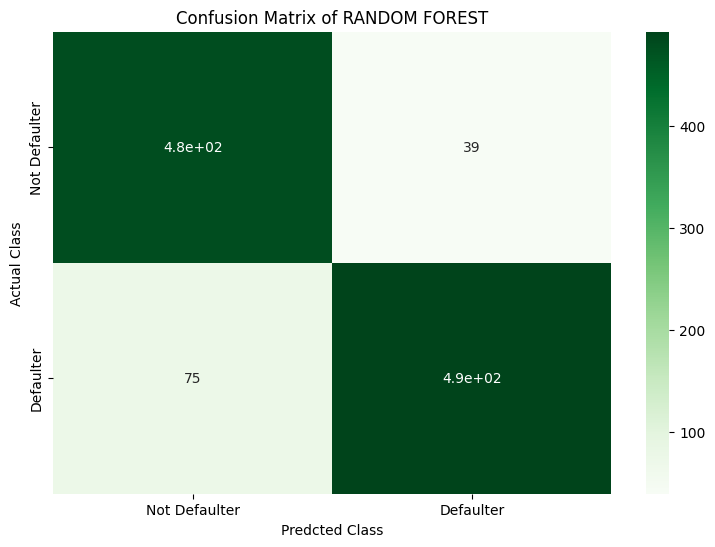

In [188]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
rf_test_precision = precision_score(y_test,y_test_rf_pred)

  # recall,
rf_test_recall = recall_score(y_test,y_test_rf_pred,)

  # f1 score
rf_f1_score = f1_score(y_test,y_test_rf_pred)

  # roc_auc_score
rf_roc_auc_score = roc_auc_score(y_test,y_test_rf_pred)

  # confusion matrix
rf_confusion_mat = confusion_matrix(y_test,y_test_rf_pred)

  # Printing all these matrices
print('Precision score of RANDOM FOREST model:',rf_test_precision)
print(' ')
print('Recall score of RANDOM FOREST model:', rf_test_recall)
print(' ')
print('F1 score of RANDOM FOREST model: ', rf_f1_score)
print(' ')
print('ROC AUC score of RANDOM FOREST model: ',rf_roc_auc_score)
print(' ')
print('Confusion matrix of RANDOM FOREST \n:',rf_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(rf_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of RANDOM FOREST',fontsize = 12)

**Random Forest Using hyperparameter tuning**

In [189]:
params_grid = {'n_estimators' : [100,150,200],'max_depth' : [10,20,30]}

In [190]:
grid_renf_clf = GridSearchCV(RandomForestClassifier(), params_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_renf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [191]:
# print best score and best params
print(grid_renf_clf.best_score_)
print(grid_renf_clf.best_params_)

0.8740196901953746
{'max_depth': 20, 'n_estimators': 200}


In [192]:
# Get the predicted classes
y_train_grid_rf_pred = grid_renf_clf.predict(X_train)
y_test_grid_rf_pred = grid_renf_clf.predict(X_test)

In [193]:
# Get the accuracy scores
ref_training_accuracy = accuracy_score(y_train_grid_rf_pred,y_train)
ref_testing_accuracy = accuracy_score(y_test_grid_rf_pred,y_test)

print("The accuracy on train data is ", ref_training_accuracy)
print("The accuracy on test data is ", ref_testing_accuracy)

The accuracy on train data is  1.0
The accuracy on test data is  0.8996316758747698


Precision score of RANDOM FOREST: 0.9226519337016574
 
Recall score of RANDOM FOREST: 0.8820422535211268
 
F1 score of RANDOM FOREST:  0.9018901890189019
 
ROC AUC score of RANDOM FOREST:  0.9004805862200228
 
Confusion matrix of RANDOM FOREST model 
: [[476  42]
 [ 67 501]]
 


Text(0.5, 1.0, 'Confusion Matrix of RANDOM FOREST')

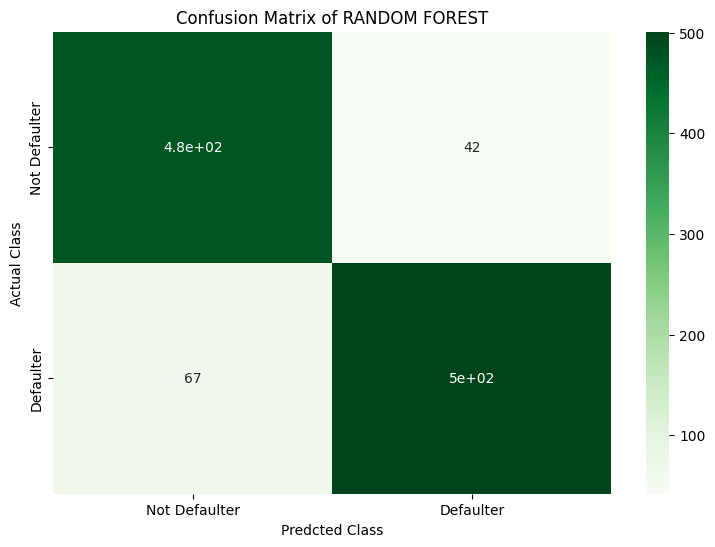

In [194]:

# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
ref_test_precision = precision_score(y_test,y_test_grid_rf_pred)

  # recall,
ref_test_recall = recall_score(y_test,y_test_grid_rf_pred,)

  # f1 score
ref_f1_score = f1_score(y_test,y_test_grid_rf_pred)

  # roc_auc_score
ref_roc_auc_score = roc_auc_score(y_test,y_test_grid_rf_pred)

  # confusion matrix
ref_confusion_mat = confusion_matrix(y_test,y_test_grid_rf_pred)

  # Printing all these matrices
print('Precision score of RANDOM FOREST:',ref_test_precision)
print(' ')
print('Recall score of RANDOM FOREST:', ref_test_recall)
print(' ')
print('F1 score of RANDOM FOREST: ', ref_f1_score)
print(' ')
print('ROC AUC score of RANDOM FOREST: ',ref_roc_auc_score)
print(' ')
print('Confusion matrix of RANDOM FOREST model \n:',ref_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(ref_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of RANDOM FOREST',fontsize = 12)



---



### **Decision Tree Classifier**

**Decision Tree Classifier with hyperparameter tuning**

In [195]:
# Building decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
decision_tree_model = GridSearchCV(dtc, param_grid = {'max_depth': [2,4,6,8],
                                                      'min_samples_leaf': [2,4,6,8,10],
                                                      'min_samples_split':[2,4,6,8,10]},
                                   scoring = 'recall',cv = 3, n_jobs = -1)
decision_tree_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='recall')

In [196]:
decision_tree_model.best_estimator_
decision_tree_model.best_params_
decision_tree_model.best_score_

0.7562683126928937

In [197]:
# Getting train and test predicted values
y_train_dtc_pred = decision_tree_model.predict(X_train)
y_test_dtc_pred = decision_tree_model.predict(X_test)

# Getting the training and testing accuracy
dtc_training_accuracy = accuracy_score(y_train,y_train_dtc_pred)
dtc_testing_accuracy = accuracy_score(y_test, y_test_dtc_pred)

print('Training accuracy of decision tree classifier:',dtc_training_accuracy)
print('Testing accuracy of decision tree classifier:',dtc_testing_accuracy)

Training accuracy of decision tree classifier: 0.8233532934131736
Testing accuracy of decision tree classifier: 0.8084714548802947


Precision score of Decision Tree model: 0.875
 
Recall score of Decision Tree model: 0.7394366197183099
 
F1 score of Decision Tree model:  0.8015267175572519
 
ROC AUC score of Decision Tree model:  0.8118032519440971
 
Confusion matrix of Decision Tree model 
: [[458  60]
 [148 420]]
 


Text(0.5, 1.0, 'Confusion Matrix of Decision Tree Model')

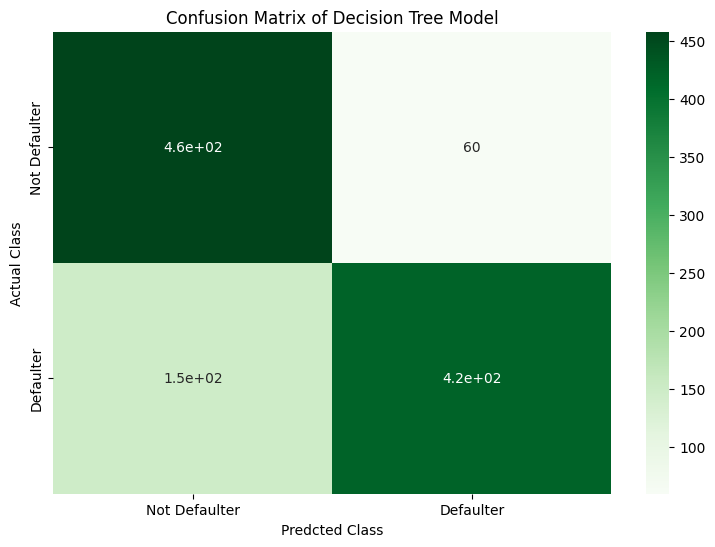

In [198]:

# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
dt_test_precision = precision_score(y_test,y_test_dtc_pred)

  # recall,
dt_test_recall = recall_score(y_test,y_test_dtc_pred,)

  # f1 score
dt_f1_score = f1_score(y_test,y_test_dtc_pred)

  # roc_auc_score
dt_roc_auc_score = roc_auc_score(y_test,y_test_dtc_pred)

  # confusion matrix
dt_confusion_mat = confusion_matrix(y_test,y_test_dtc_pred)

  # Printing all these matrices
print('Precision score of Decision Tree model:',dt_test_precision)
print(' ')
print('Recall score of Decision Tree model:', dt_test_recall)
print(' ')
print('F1 score of Decision Tree model: ', dt_f1_score)
print(' ')
print('ROC AUC score of Decision Tree model: ',dt_roc_auc_score)
print(' ')
print('Confusion matrix of Decision Tree model \n:',dt_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(dt_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of Decision Tree Model',fontsize = 12)

### **XGBoost**

In [199]:
# Import xgboost
from xgboost import XGBClassifier

# Fitting XGboost
xgb = XGBClassifier(class_weight = 'balanced',parameters = {'max_depth':7,'eta':1,'silent':1,'eval_metric':'auc'},random_state = 42)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [200]:
# Train and test prediction
y_train_xgb_pred = xgb.predict(X_train)
y_test_xgb_pred = xgb.predict(X_test)


# gettig training and testing accuracy
xgb_training_accuracy = accuracy_score(y_train_xgb_pred,y_train)
xgb_testing_accuracy = accuracy_score(y_test_xgb_pred,y_test)

print(f'Training Accuracy of XGBClassifier: {xgb_training_accuracy}')
print(f'Testing Accuracy of XGBClassifier: {xgb_testing_accuracy}')

Training Accuracy of XGBClassifier: 0.9967756794104099
Testing Accuracy of XGBClassifier: 0.9033149171270718


Precision score of XGBoost model: 0.9376181474480151
 
Recall score of XGBoost model: 0.8732394366197183
 
F1 score of XGBoost model:  0.9042844120328167
 
ROC AUC score of XGBoost model:  0.9047664364565773
 
Confusion matrix of XGBoost model 
: [[485  33]
 [ 72 496]]
 


Text(0.5, 1.0, 'Confusion Matrix of XGBoost Model')

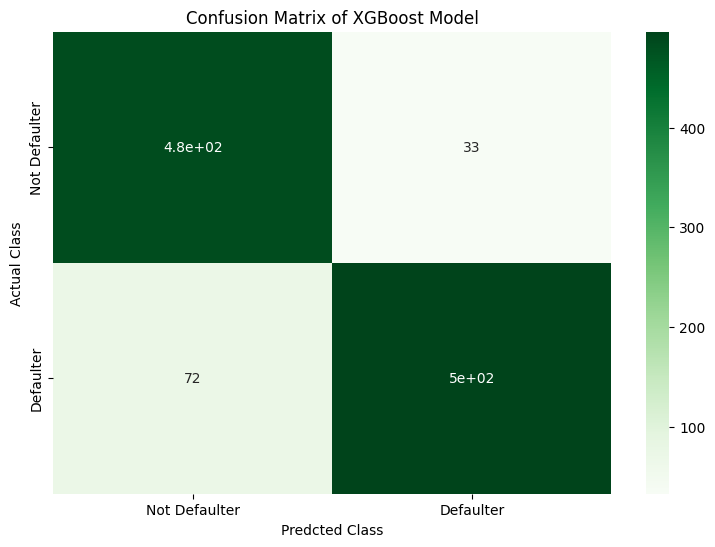

In [201]:

# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
xg_test_precision = precision_score(y_test,y_test_xgb_pred)

  # recall,
xg_test_recall = recall_score(y_test,y_test_xgb_pred,)

  # f1 score
xg_f1_score = f1_score(y_test,y_test_xgb_pred)

  # roc_auc_score
xg_roc_auc_score = roc_auc_score(y_test,y_test_xgb_pred)

  # confusion matrix
xg_confusion_mat = confusion_matrix(y_test,y_test_xgb_pred)

  # Printing all these matrices
print('Precision score of XGBoost model:',xg_test_precision)
print(' ')
print('Recall score of XGBoost model:', xg_test_recall)
print(' ')
print('F1 score of XGBoost model: ', xg_f1_score)
print(' ')
print('ROC AUC score of XGBoost model: ',xg_roc_auc_score)
print(' ')
print('Confusion matrix of XGBoost model \n:',xg_confusion_mat)
print(' ')
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(xg_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of XGBoost Model',fontsize = 12)

## **EVALUATION MATRIX**

In [202]:
# explaining evaluation matrix
Models = ['Logistic Regression','Random Forest','Random Forest tuning','Decision Tree Classifier', 'XGBoost Classifier']
train_accuracy = [train_accuracy, rf_training_accuracy, ref_training_accuracy,dtc_training_accuracy, xgb_training_accuracy]
test_accuracy = [test_accuracy, rf_testing_accuracy, ref_testing_accuracy,dtc_testing_accuracy, xgb_testing_accuracy]
precision_score = [log_test_precision, rf_test_precision, ref_test_precision,dt_test_precision, xg_test_precision]
recall_score = [log_test_recall, rf_test_recall, ref_test_recall,dt_test_recall,xg_test_recall]
f1_score = [log_f1_score, rf_f1_score, ref_f1_score,dt_f1_score, xg_f1_score]
roc_auc_score = [log_roc_auc_score, rf_roc_auc_score, ref_roc_auc_score,dt_roc_auc_score, xg_roc_auc_score]

data = {'Classification Models':Models,'Training Accuracy':train_accuracy,'Testing Accuracy':test_accuracy,
        'Precision Score':precision_score,'Recall Score':recall_score,'F1 Score':f1_score,'ROC-AUC Score':roc_auc_score}

evaluation_matrix = pd.DataFrame(data)
evaluation_matrix

,Classification Models,Training Accuracy,Testing Accuracy,Precision Score,Recall Score,F1 Score,ROC-AUC Score
0,Logistic Regression,0.804929,0.802026,0.889625,0.709507,0.789422,0.806491
1,Random Forest,1.000000,0.895028,0.926692,0.867958,0.896364,0.896334
2,Random Forest tuning,1.000000,0.899632,0.922652,0.882042,0.901890,0.900481
3,Decision Tree Classifier,0.823353,0.808471,0.875000,0.739437,0.801527,0.811803
4,XGBoost Classifier,0.996776,0.903315,0.937618,0.873239,0.904284,0.904766


## **MODEL EXPLAINABILITY**

**Apply sharply for FEATURES IMPORTANCE**

In [203]:
# Install shap
!pip install shap

In [204]:
# Import dependancy
from shap import force_plot
from shap import TreeExplainer
from shap import summary_plot

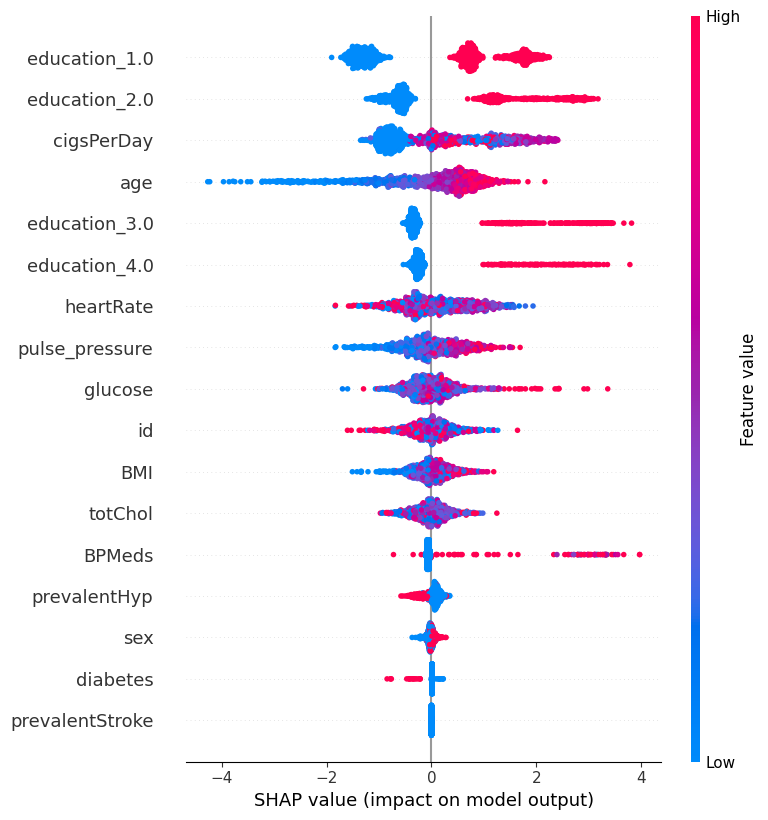

In [205]:
# plotting summary plot
explainer = TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
summary_plot(shap_values,X_test)

**From the Shap Summary_Plot we can explain our complex model.**

* Red column shows the high features values
* Blue column shows low feature values.
* On X axis there are shap values, positive will tell you about defaulter and negative values will tell customers will not default in next month.
* On y-axis, features are ordered in decreasing order in sense of importance for the XGBoost model to predict the default.

# **Model Explanation**

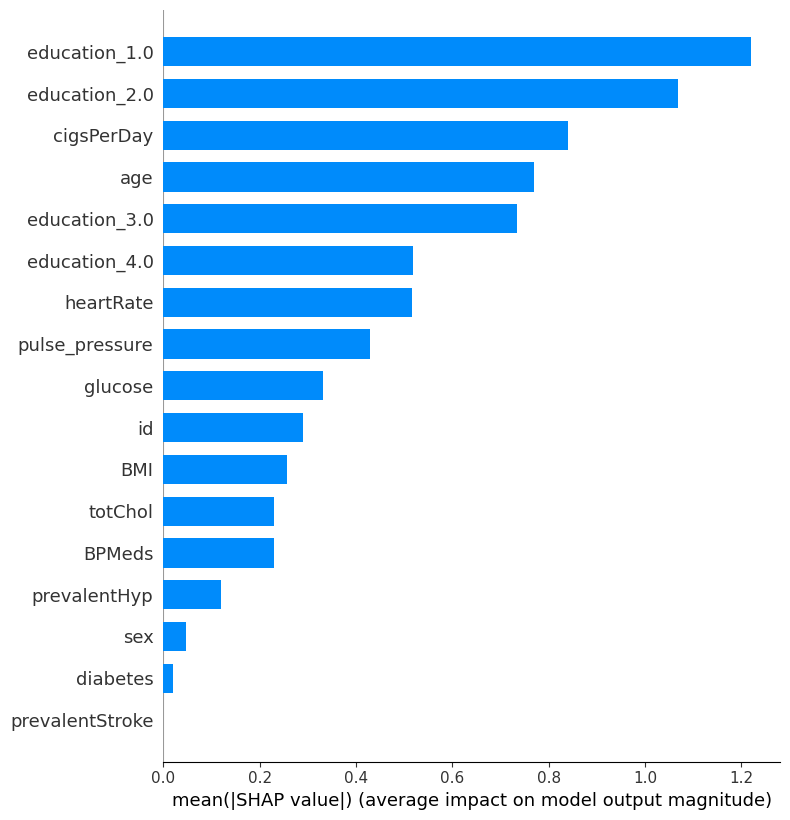

In [206]:
# Shap summary_plot with bar
summary_plot(shap_values, X_train, plot_type="bar")

# **Conclusion:-**


### **Prepare for Modeling**

* In this project, we tackled a classification problem in which we had to classify and predict the 10-year risk of future coronary heart disease (CHD) for patients. The goal of the project was to develop a tool for the early detection and prevention of CHD, addressing a significant public health concern using machine learning techniques.

There were approximately 3390 records and 16 attributes in the dataset.

We started by importing the dataset, and necessary libraries and conducted exploratory data analysis (EDA) to get a clear insight into each feature by separating the dataset into numeric and categoric features. We did Univariate, Bivariate, and even multivariate analyses.

After that, the outliers and null values were removed from the raw data and treated. Data were transformed to ensure that it was compatible with machine learning models.

In feature engineering we transformed raw data into a more useful and informative form, by creating new features, encoding, and understanding important features. We handled target class imbalance using SMOTE.

Then finally cleaned and scaled data was sent to various models, the metrics were made to evaluate the model, and we tuned the hyperparameters to make sure the right parameters were being passed to the model. To select the final model based on requirements, we checked model_result.

When developing a machine learning model, it is generally recommended to track multiple metrics because each one highlights distinct aspects of model performance. We are, however, focusing more on the Recall score and F1 score because we are dealing with healthcare data and our data is unbalanced.

Our highest Precision Score, 0.922%, came from Random Forest hyper meter tunning.

The XGBoost and Random ForestClassifier tree-based algorithms also provided the best approach to achieving our goal. We were successful in achieving a respective f1-score of 0.904 and 0.893.
The recall score is of the outmost significance in the medical field, where we place a greater emphasis on reducing false negative values because we do not want to mispredict a person's safety when he is at risk. With recall scores of 0.938, 0.870, and 0.863, respectively,  XGB, performed the best.

Last but not least, we can select the Final model as our XGB . It is acceptable to classify a healthy individual as having a 10-year risk of coronary heart disease CHD (false positive) and to follow up with additional medical tests; however, it is categorically unacceptable to miss identifying a particular patient or to classify a particular patient as healthy (false negative).

---








---






### **Model Explaination**
We didn't want to mispredict a person's safety when he has the risk of 10 years of CHD, so the final model we chose was XBG